In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files

In [68]:
episodes = 100
max_steps = 100
n_state = 50
m_lr = 0.6
r_lr = 0.6
r_eps = 0.1
num_zero = n_state//2

In [69]:
def random_quadratic(r):
  i = random.uniform(5,10)
  j = 1
  a = (r - j)/(1-i)**2
  funk = lambda x : a*(x - i)**2 + j
  return funk

# f = random_quadratic(0.1)
# for i in range(10):
#   print(f(i))

In [76]:
class Env():
  def __init__(self, n_state):
    self.n_state = n_state
    self.state = np.random.choice(n_state)
    self.previous_state = None
    self.freq = [0]*self.n_state

    
    n_z = int(num_zero * n_state)
    # print(n_z, num_zero, n_state)

    self.initial_reward = [random_quadratic(random.random() * 0.1) for i in range(self.n_state - n_z)] + \
                          [lambda x : 0 for i in range(n_z)]

    # for i in self.initial_reward:
    #   print(i(1))
    # print(self.initial_reward)
  def reward_func(self, state):
    self.freq[self.state] += 1
    if self.state != self.previous_state:
      self.freq[self.previous_state] = 0
    y = self.initial_reward[state](self.freq[self.state])
    
    return y

  def step(self, action):
    self.previous_state = self.state
    self.state = action
    ob = self.state
    reward = self.reward_func(self.state)
    return ob, reward  

In [31]:
class QLearner():
  def __init__(self, n_action, lr=0.1):
    self.n_action = n_action
    self.q_values = np.random.randn(n_action)*0.01
    self.lr = lr

    def act(self):
      pass
    
    def learn(self, action, reward):
      pass


In [32]:
class MotivatedAgent(QLearner):
    def __init__(self, n_action, lr=0.1):
      QLearner.__init__(self, n_action, lr)
      self.reward_threshold = 0
      self.previous_reward = -float('inf')
      self.previous_action = None

    def act(self):
      if self.previous_reward > self.reward_threshold:
        action = self.previous_action
      else:
        action = np.random.choice(self.n_action)
      return action

    def learn(self, action, reward):
      self.previous_action = action
      self.previous_reward = reward
      self.q_values[action] = (1-self.lr)*self.q_values[action] + self.lr*reward


In [33]:
class LearningAgent(QLearner):
    def __init__(self, n_action, lr=0.1, eps=0.5):
      QLearner.__init__(self, n_action, lr)
      self.eps = eps
      # print(self.q_values)
      
    def act(self):
      if np.random.rand() < self.eps:
        action = np.random.choice(self.n_action)
      else:
        action = np.argmax(self.q_values)
      return action

    def learn(self, action, reward):
      self.q_values[action] = (1-self.lr)*self.q_values[action] + self.lr*reward

In [53]:
def run_one_agent(agent, max_steps, n_state, title):
  env = Env(n_state)
  rewards = list()
  states = list()
  state_prob = np.zeros(n_state)
  q_val_matrix = np.zeros((n_state, max_steps))

  for i in range(max_steps):
    action = agent.act()
    states.append(action)
    state_prob[action] += 1
    ob, reward = env.step(action)
    agent.learn(action, reward)
    q_val_matrix[:,i] = agent.q_values

    rewards.append(reward)

    # plt.plot(rewards, color="#FFD700")
    # plt.xlim([0, max_steps])
    
    # plt.xlabel('Steps')
    # plt.ylabel('Reward')

    
    # plt.savefig(str(i) + title + ".png")
    # files.download(str(i) + title + ".png")
    # print(str(i) + title + ".png")
    
  return rewards, state_prob/max_steps, q_val_matrix, states

In [72]:
def run_multiple_agents():
  m_rewards_all = list()
  r_rewards_all = list()

  m_state_prob_all = list()
  r_state_prob_all = list()
  
  for i in range(episodes):
    motivated_agent = MotivatedAgent(n_action=n_state, lr=m_lr)
    m_reward, m_state_prob, m_q_val_matrix, m_states = run_one_agent(motivated_agent, max_steps, n_state, "motivated")
    m_rewards_all.append(m_reward)
    m_state_prob_all.append(m_state_prob)

    learning_agent = LearningAgent(n_action=n_state, lr=r_lr, eps=r_eps)
    r_reward, r_state_prob, r_q_val_matrix, r_states = run_one_agent(learning_agent, max_steps,n_state, "learning")
    r_rewards_all.append(r_reward)
    r_state_prob_all.append(r_state_prob)

  m_rewards_all = np.array(m_rewards_all)
  r_rewards_all = np.array(r_rewards_all)

  m_state_prob_all = np.array(m_state_prob_all)
  r_state_prob_all = np.array(r_state_prob_all)

  r_q_val_matrix = np.zeros((n_state, max_steps))
  r_states = list()

  return m_rewards_all, r_rewards_all, m_state_prob_all, r_state_prob_all, m_q_val_matrix, r_q_val_matrix, m_states, r_states

In [74]:
m_rewards_all, r_rewards_all, m_state_prob, r_state_prob, m_q_val_matrix, r_q_val_matrix, m_states, r_states  = run_multiple_agents()

1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50
1250 25 50

In [59]:
m_rewards = m_rewards_all.mean(axis=0)
r_rewards = r_rewards_all.mean(axis=0)
m_state_prob = m_state_prob.mean(axis=0)
r_state_prob = r_state_prob.mean(axis=0)



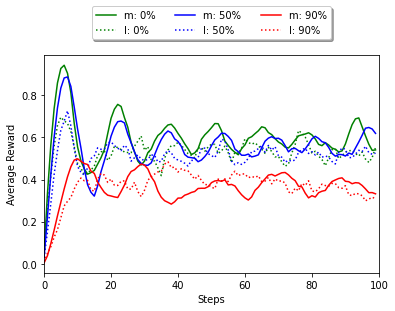

In [78]:
zeros = [0, 0.50, 0.90]
label = [0, 50, 90]
c = ['g','b','r']
from scipy.signal import savgol_filter
for i, z in enumerate(zeros):
  num_zero = z
  m_rewards_all, r_rewards_all, m_state_prob, r_state_prob, m_q_val_matrix, r_q_val_matrix, m_states, r_states  = run_multiple_agents()

  m_rewards = m_rewards_all.mean(axis=0)
  r_rewards = r_rewards_all.mean(axis=0)
  m_state_prob = m_state_prob.mean(axis=0)
  r_state_prob = r_state_prob.mean(axis=0)

  # m_rewards_smooth = savgol_filter(m_rewards, 7, 1) # window size 51, polynomial order 3
  plt.plot(m_rewards, c[i] + '-', label='m: ' + str(label[i]) + '%')
  # r_rewards_smooth = savgol_filter(r_rewards, 7, 1)
  plt.plot(r_rewards, c[i] + ':', label='l: ' + str(label[i]) + '%')

  plt.xlim([0, max_steps])
  
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

  

Text(0, 0.5, 'Average Reward')

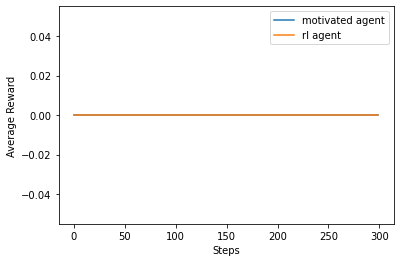

In [39]:
from scipy.signal import savgol_filter
m_rewards_smooth = savgol_filter(m_rewards, 7, 1) # window size 51, polynomial order 3
r_rewards_smooth = savgol_filter(r_rewards, 7, 1)
plt.plot(m_rewards_smooth, label='motivated agent')
plt.plot(r_rewards_smooth, label='rl agent')
# plt.plot(m_rewards)
# plt.plot(r_rewards)

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')


# plt.savefig("abc.png")
# files.download("abc.png") 

Text(0, 0.5, 'Average State Probability')

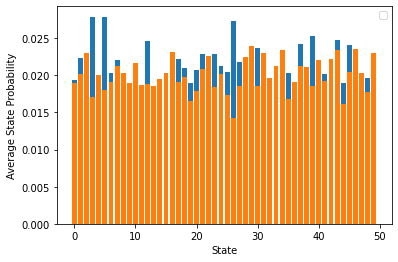

In [14]:
plt.bar(np.arange(0,n_state), m_state_prob)
plt.bar(np.arange(0,n_state), r_state_prob)

plt.legend()
plt.xlabel('State')
plt.ylabel('Average State Probability')

In [15]:
print('Motivated Agent States Visited:', np.where(m_state_prob>0.1))
print('Learning Agent States Visited:', np.where(r_state_prob>0.1))

Motivated Agent States Visited: (array([], dtype=int64),)
Learning Agent States Visited: (array([], dtype=int64),)


Text(0.5, 1.0, 'Motivated Agent Q Values')

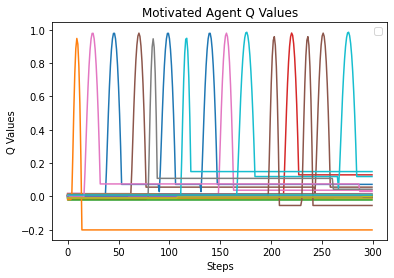

In [16]:
plt.plot(m_q_val_matrix.T)
# plt.plot(_q_val_matrix)

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Q Values')
plt.title('Motivated Agent Q Values')

In [17]:
x = np.argwhere(m_q_val_matrix > 0.2)
unique_states = np.unique(x[:,0])

In [18]:
unique_states

array([ 3,  5,  6, 10, 29, 39, 41, 45, 46, 47])

Text(0.5, 1.0, 'Learning Agent Q Values')

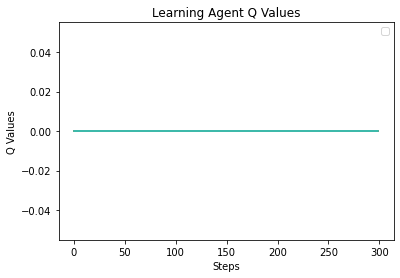

In [19]:
plt.plot(r_q_val_matrix.T)
# plt.plot(_q_val_matrix)

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Q Values')
plt.title('Learning Agent Q Values')

In [20]:
x = np.argwhere(r_q_val_matrix > 0.2)
unique_states = np.unique(x[:,0])
unique_states

array([], dtype=int64)

Text(0, 0.5, 'Reward')

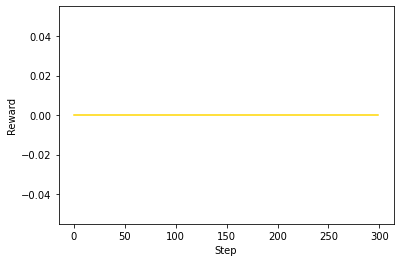

In [21]:
plt.plot(np.arange(max_steps), [0] * max_steps, color="#FFD700")
plt.xlabel("Step")
plt.ylabel("Reward")